# An Analysis of Global Plastic Pollution

Data sources: World Bank, Our World in Data

Data was reported in 2016.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [2]:
df1 = pd.read_excel(filepath)
df1.set_index('Country')

,Region,Income status,GDP per capita,Population (M),Plastic waste generation [tonnes],Solid waste generation [tonnes],% Plastic in solid waste,Per capita plastic waste generation [kg/year],% Inadequately managed waste,% Littered waste,% Mismanaged plastic waste,Mismanaged plastic waste [tonnes]
Country,,,,,,,,,,,,
Sint Maarten (Dutch part),LAC,HIC,38230.031864,39969,NaN,NaN,13.0,NaN,NaN,2,NaN,NaN
Turks and Caicos Islands,LAC,HIC,26352.449392,36559,NaN,NaN,16.3,NaN,NaN,2,NaN,NaN
United States,NORAM,HIC,57951.584082,323071342,4.202722e+07,320818436.0,13.1,130.090000,0.66,2,2.66,1.688928e+06
India,SAR,LMC,5839.898589,1324509589,2.632793e+07,277136133.0,9.5,19.877495,77.00,2,79.00,2.079907e+07
China,EAP,UMC,13572.619989,1378665000,2.159947e+07,220402706.0,9.8,15.666942,23.25,2,25.25,5.453865e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
Marshall Islands,EAP,UMC,3581.176870,57735,1.126580e+03,8666.0,13.0,19.512947,63.20,2,65.20,7.345302e+02
San Marino,ECA,HIC,57453.848483,33504,9.618000e+02,17175.0,5.6,28.707020,54.95,2,56.95,5.477451e+02
Nauru,EAP,UMC,10960.850979,13049,8.883600e+02,5384.0,16.5,68.078780,NaN,2,NaN,NaN


## Part I: Exploratory Data Analysis

In [3]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Country                                        217 non-null    object 
 1   Region                                         217 non-null    object 
 2   Income status                                  217 non-null    object 
 3   GDP per capita                                 194 non-null    float64
 4   Population (M)                                 217 non-null    int64  
 5   Plastic waste generation [tonnes]              215 non-null    float64
 6   Solid waste generation [tonnes]                215 non-null    float64
 7   % Plastic in solid waste                       217 non-null    float64
 8   Per capita plastic waste generation [kg/year]  215 non-null    float64
 9   % Inadequately managed waste                   174 non

,GDP per capita,Population (M),Plastic waste generation [tonnes],Solid waste generation [tonnes],% Plastic in solid waste,Per capita plastic waste generation [kg/year],% Inadequately managed waste,% Littered waste,% Mismanaged plastic waste,Mismanaged plastic waste [tonnes]
count,194.000000,2.170000e+02,2.150000e+02,2.150000e+02,217.000000,215.000000,174.000000,217.0,174.00000,1.740000e+02
mean,20350.834725,3.411255e+07,1.075603e+06,9.647187e+06,11.292368,46.466479,44.707085,2.0,46.52266,4.693937e+05
std,20905.600119,1.345012e+08,3.891626e+06,3.375479e+07,5.143838,44.222095,38.221226,0.0,37.95651,1.819056e+06
min,796.944387,1.122500e+04,5.068500e+02,3.989000e+03,1.000000,1.493604,0.000000,2.0,2.00000,2.572848e+01
25%,4694.457958,7.713660e+05,2.518929e+04,2.385625e+05,7.600000,16.028929,2.679000,2.0,4.67900,8.079721e+03
50%,12611.802691,6.356143e+06,1.673315e+05,1.862514e+06,11.000000,32.162720,39.650000,2.0,41.65000,4.835164e+04
75%,28219.496443,2.355700e+07,6.114521e+05,5.314744e+06,13.900000,60.037222,84.510000,2.0,86.51000,2.674286e+05
max,115698.059238,1.378665e+09,4.202722e+07,3.208184e+08,32.000000,308.253465,100.100000,2.0,100.00000,2.079907e+07


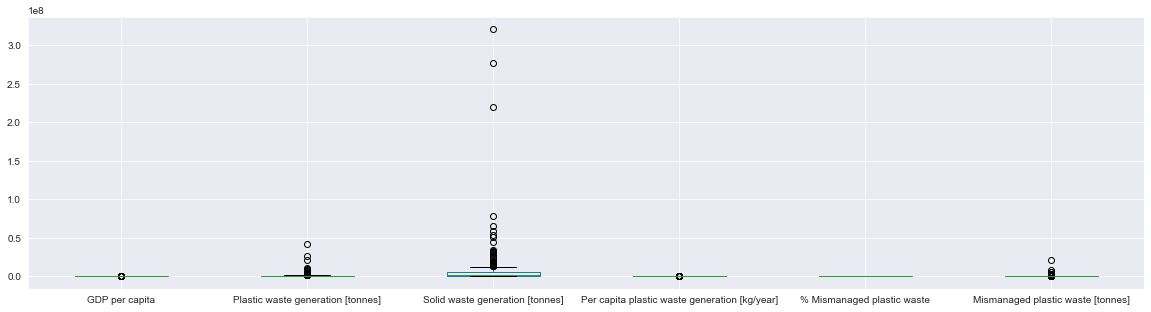

In [4]:
# Identify outliers, remove irrelevant columns
df2 = df1.drop(columns=['Population (M)', '% Plastic in solid waste', '% Inadequately managed waste', '% Littered waste'])
df2.plot(kind='box')
plt.show()

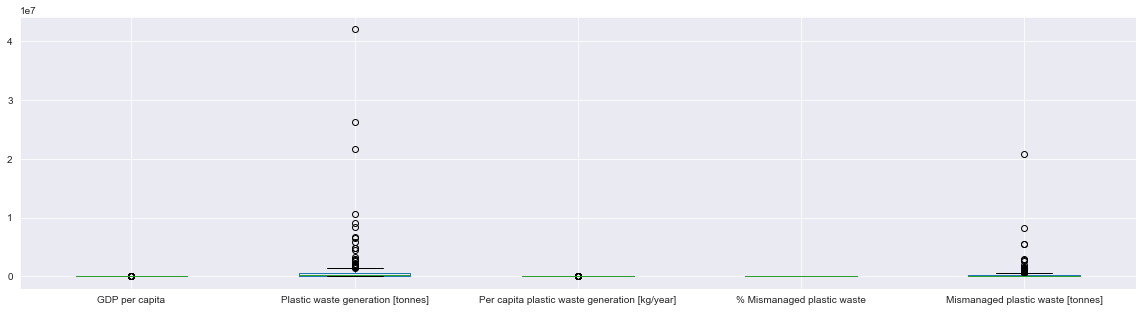

In [5]:
# Remove Solid waste generation because it is out of the scope of this analysis
df3 = df1.drop(columns=['Population (M)', '% Plastic in solid waste', '% Inadequately managed waste', '% Littered waste', 'Solid waste generation [tonnes]'])
df3.plot(kind='box')
plt.show()

### 1. Who generates the most plastic waste?

In [6]:
# Top 10 countries with the highest annual plastic waste
df2[['Country', 'Plastic waste generation [tonnes]']].nlargest(10, 'Plastic waste generation [tonnes]')

,Country,Plastic waste generation [tonnes]
2,United States,4.202722e+07
3,India,2.632793e+07
4,China,2.159947e+07
5,Brazil,1.067599e+07
6,Indonesia,9.128000e+06
7,Russian Federation,8.467156e+06
8,Germany,6.683412e+06
9,United Kingdom,6.471650e+06
10,Mexico,5.902490e+06
11,Japan,4.881161e+06


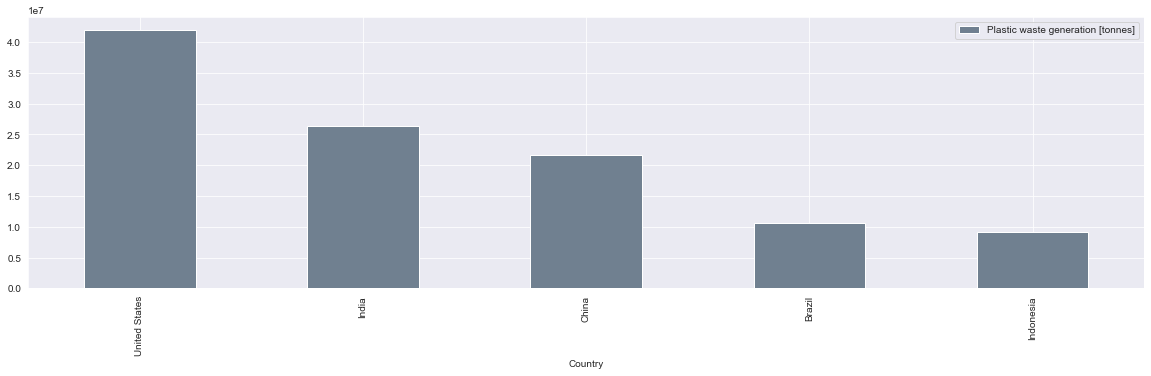

In [7]:
top5_waste = df2[['Country', 'Plastic waste generation [tonnes]']].nlargest(5, 'Plastic waste generation [tonnes]')
top5_waste.plot('Country', 'Plastic waste generation [tonnes]', kind='bar', color='slategray')

plt.show()

In [8]:
# Top 10 countries with the lowest annual plastic waste
df2[['Country', 'Plastic waste generation [tonnes]']].nsmallest(10, 'Plastic waste generation [tonnes]')

,Country,Plastic waste generation [tonnes]
216,Monaco,506.850
215,Tuvalu,658.185
214,Nauru,888.360
213,San Marino,961.800
212,Marshall Islands,1126.580
211,Greenland,1286.424
210,Liechtenstein,1916.244
209,Dominica,2166.720
208,Tonga,2391.766
207,Saint Martin (French part),2415.250


In [9]:
# Top 10 countries with the highest plastic waste per capita
df1[['Country', 'Population (M)', 'Per capita plastic waste generation [kg/year]']].nlargest(10, 'Per capita plastic waste generation [kg/year]')

,Country,Population (M),Per capita plastic waste generation [kg/year]
157,"Micronesia, Fed. Sts.",110215,308.253465
167,Virgin Islands (U.S.),107510,206.432890
180,Bermuda,64555,205.931841
200,Palau,17725,170.191255
186,Faroe Islands,48173,167.532539
34,"Hong Kong SAR, China",7336600,163.452681
187,St. Kitts and Nevis,51625,150.007942
148,Iceland,335439,144.800515
46,Singapore,5607283,143.956004
69,Mongolia,3056359,137.582005


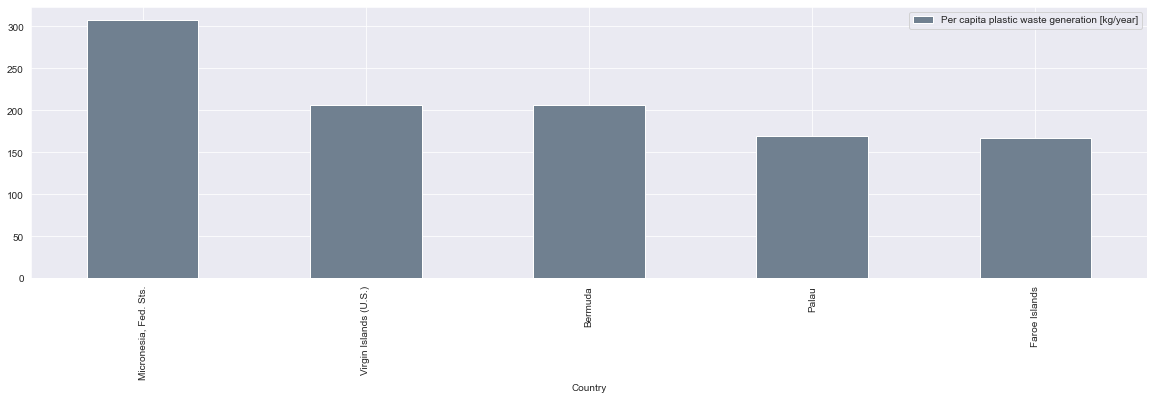

In [10]:
top5_per_capita = df2[['Country', 'Per capita plastic waste generation [kg/year]']].nlargest(5, 'Per capita plastic waste generation [kg/year]')
top5_per_capita.plot('Country', 'Per capita plastic waste generation [kg/year]', kind='bar', color='slategray')

plt.show()

In [11]:
# Top 10 countries with the lowest amount of plastic waste per capita
df1[['Country', 'Population (M)', 'Per capita plastic waste generation [kg/year]']].nsmallest(10, 'Per capita plastic waste generation [kg/year]')

,Country,Population (M),Per capita plastic waste generation [kg/year]
110,Ethiopia,103603501,1.493604
181,Turkmenistan,5662372,2.189864
149,Mali,17965429,2.457597
153,Guinea,11738441,3.207135
166,Lao PDR,6845846,3.247552
120,Uzbekistan,31847900,3.628665
132,Niger,20788838,4.118956
184,Lesotho,2075001,4.155245
49,Bangladesh,157970840,4.842355
117,Cameroon,23926539,4.995207


### 2. Who generates the most mismanaged plastic waste?

In [12]:
# Top 10 countries with the highest mismanaged waste
df2[['Country', 'Mismanaged plastic waste [tonnes]']].nlargest(10, 'Mismanaged plastic waste [tonnes]')

,Country,Mismanaged plastic waste [tonnes]
3,India,2.079907e+07
7,Russian Federation,8.255477e+06
6,Indonesia,5.522440e+06
4,China,5.453865e+06
12,Thailand,2.985818e+06
15,"Egypt, Arab Rep.",2.718719e+06
5,Brazil,2.691344e+06
17,Pakistan,1.966873e+06
2,United States,1.688928e+06
24,Nigeria,1.360792e+06


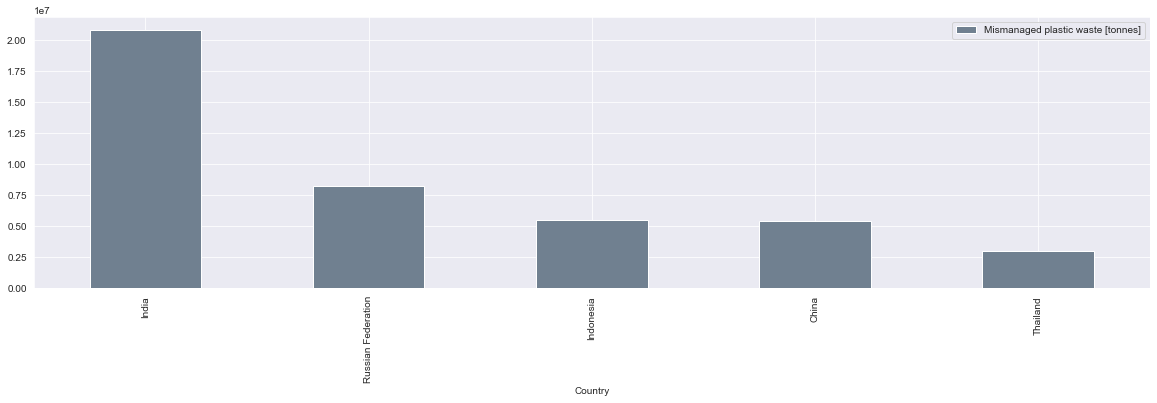

In [13]:
top5_mismanaged = df2[['Country', 'Mismanaged plastic waste [tonnes]']].nlargest(5, 'Mismanaged plastic waste [tonnes]')
top5_mismanaged.plot('Country', 'Mismanaged plastic waste [tonnes]', kind='bar', color='slategray')

plt.show()

In [14]:
# Top 10 countries with the lowest mismanaged waste
df2[['Country', 'Mismanaged plastic waste [tonnes]']].nsmallest(10, 'Mismanaged plastic waste [tonnes]')

,Country,Mismanaged plastic waste [tonnes]
211,Greenland,25.728480
216,Monaco,58.794600
188,Isle of Man,138.366200
197,Antigua and Barbuda,140.002668
187,St. Kitts and Nevis,154.883200
209,Dominica,173.337600
192,Grenada,185.740660
180,Bermuda,265.878600
170,Bhutan,396.882200
168,Channel Islands,438.385850


### 3. Is there a correlation between GDP per capita and waste generation?

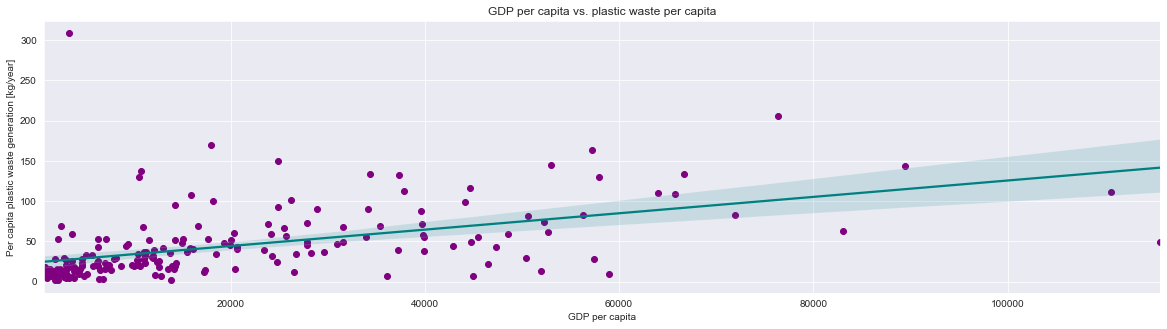

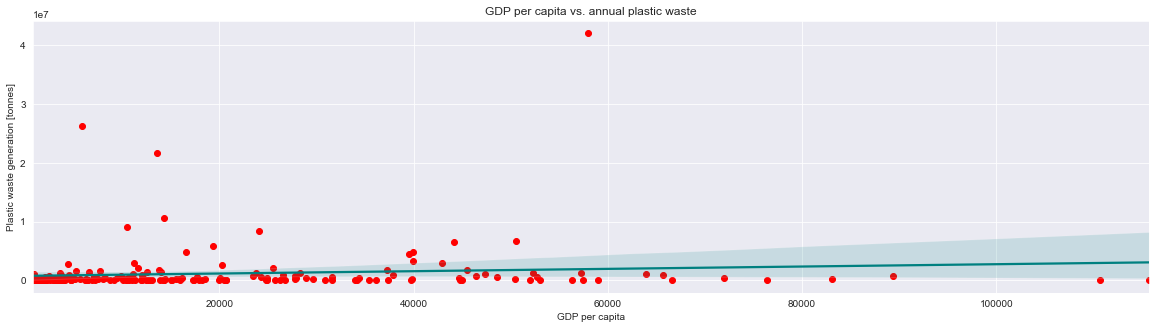

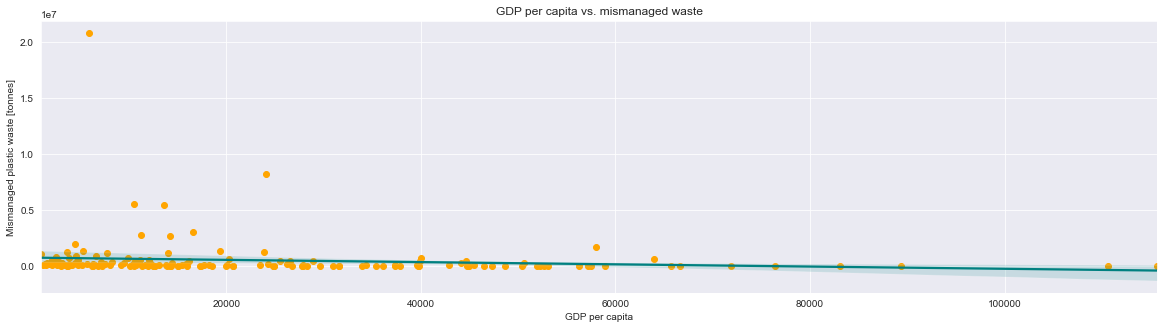

In [15]:
plt.scatter(df1['GDP per capita'], df1['Per capita plastic waste generation [kg/year]'], color='purple')
plt.xlabel('2016 GDP per capita')
plt.ylabel('Annual plastic waste per capita (kg)')
plt.title('GDP per capita vs. plastic waste per capita')
sns.regplot(x='GDP per capita', y='Per capita plastic waste generation [kg/year]', data=df1, color='teal', scatter=None)
plt.show()

plt.scatter(df1['GDP per capita'], df1['Plastic waste generation [tonnes]'], color='red')
plt.xlabel('2016 GDP per capita')
plt.ylabel('Annual plastic waste (tonnes)')
plt.title('GDP per capita vs. annual plastic waste')
sns.regplot(x='GDP per capita', y='Plastic waste generation [tonnes]', data=df1, color='teal', scatter=None)
plt.show()

plt.scatter(df1['GDP per capita'], df1['Mismanaged plastic waste [tonnes]'], color='orange')
plt.xlabel('2016 GDP per capita')
plt.ylabel('Annual mismanaged plastic waste (tonnes)')
plt.title('GDP per capita vs. mismanaged waste')
sns.regplot(x='GDP per capita', y='Mismanaged plastic waste [tonnes]', data=df1, color='teal', scatter=None)
plt.show()

### 4. What regions generate the most mismanaged waste and overall waste?

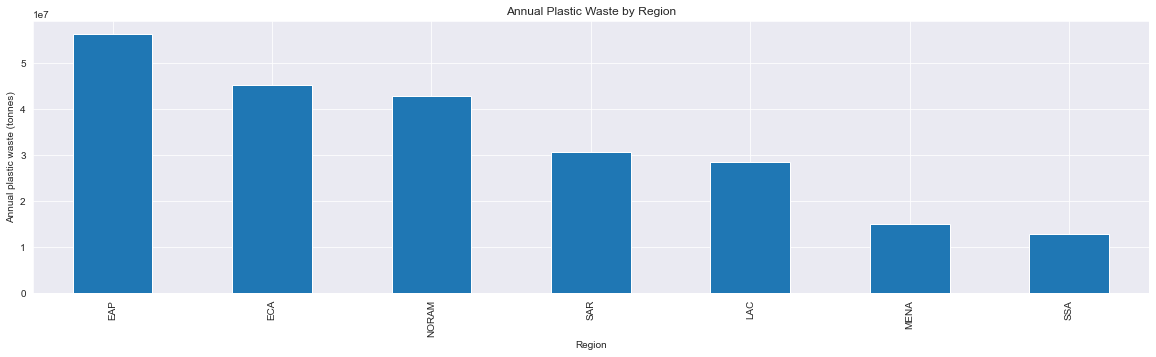

In [16]:
df1.groupby(['Region'])['Plastic waste generation [tonnes]'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Annual plastic waste (tonnes)')
plt.title('Annual Plastic Waste by Region')
plt.show()

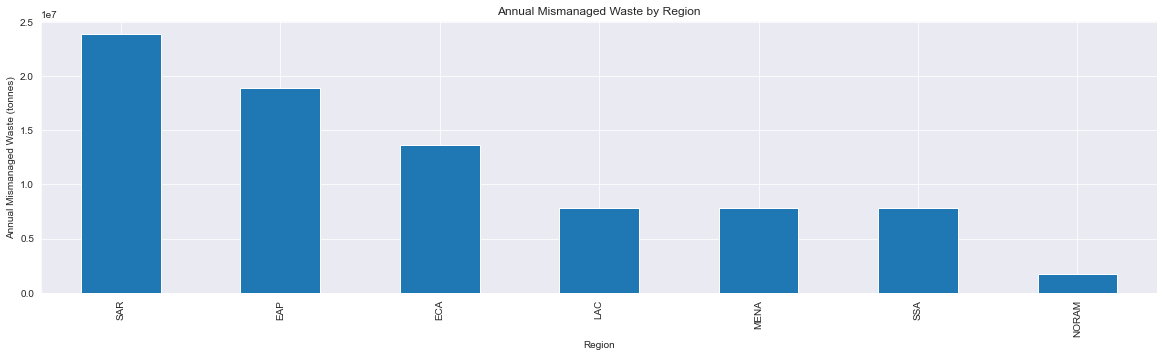

In [17]:
df1.groupby(['Region'])['Mismanaged plastic waste [tonnes]'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Annual Mismanaged Waste (tonnes)')
plt.title('Annual Mismanaged Waste by Region')
plt.show()

### 5. Does income have an effect on waste generation?

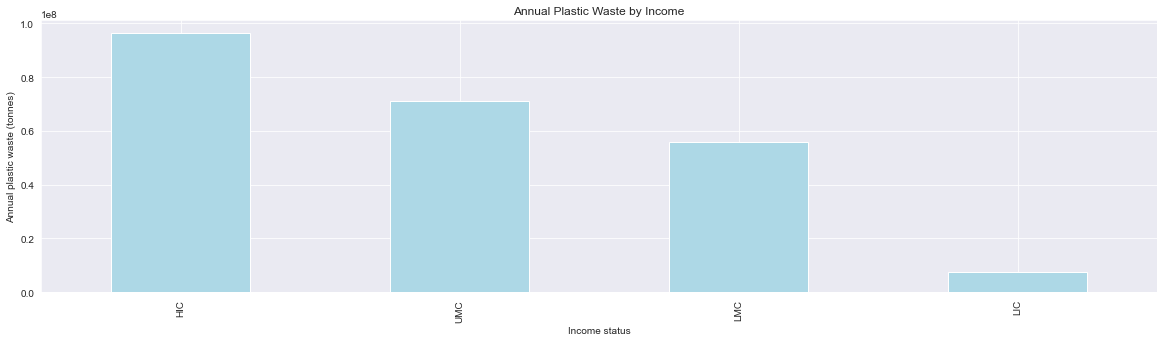

In [18]:
df1.groupby(['Income status'])['Plastic waste generation [tonnes]'].sum().sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.ylabel('Annual plastic waste (tonnes)')
plt.title('Annual Plastic Waste by Income')
plt.show()

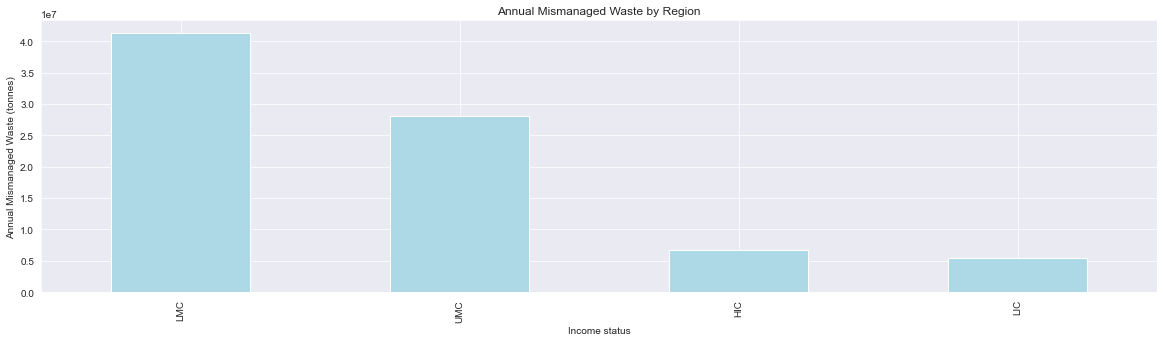

In [19]:
df1.groupby(['Income status'])['Mismanaged plastic waste [tonnes]'].sum().sort_values(ascending=False).plot(kind='bar', color='lightblue')
plt.ylabel('Annual Mismanaged Waste (tonnes)')
plt.title('Annual Mismanaged Waste by Region')
plt.show()

## Part II: Insights

### 1. The United States generates more plastic waste than any other country

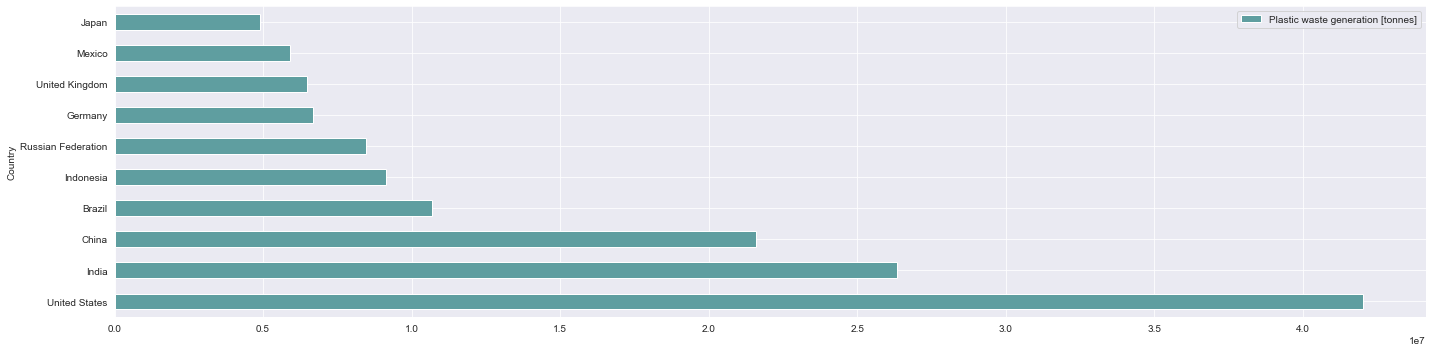

In [20]:
top10_waste = df2[['Country', 'Plastic waste generation [tonnes]']].nlargest(10, 'Plastic waste generation [tonnes]')
top10_waste.plot('Country', 'Plastic waste generation [tonnes]', kind='barh', color='cadetblue')

plt.tight_layout()
plt.show()

- **41%** of the world's plastic waste is generated in just three countries: United States, India, and China
- The United States alone generates nearly 20% - **60% more than India and 95% more than China** 
- Among the top 10 countries with the highest plastic waste, 40% are high income countries, 40% are upper-middle income, and 20% are lower-middle income

### 2. India generates the most mismanaged waste worldwide

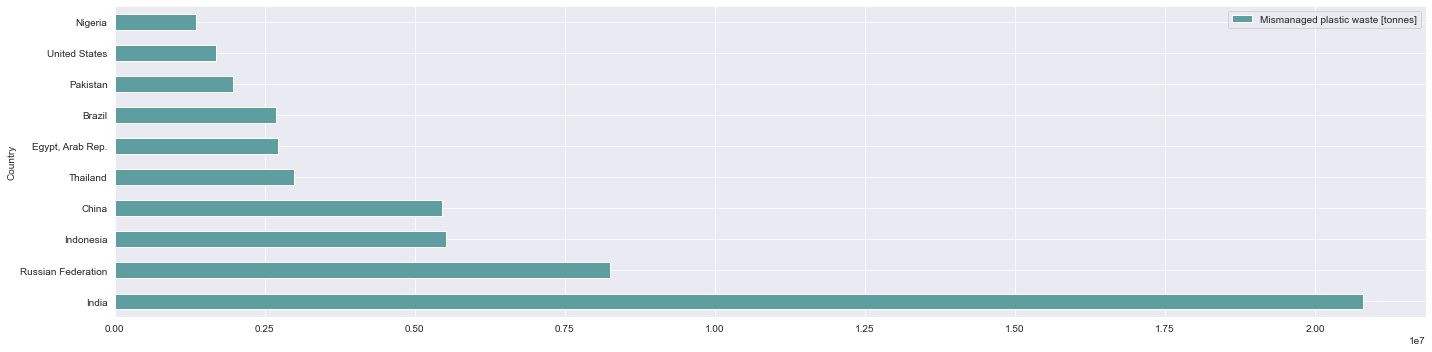

In [21]:
top10_mismanaged = df2[['Country', 'Mismanaged plastic waste [tonnes]']].nlargest(10, 'Mismanaged plastic waste [tonnes]')
top10_mismanaged.plot('Country', 'Mismanaged plastic waste [tonnes]', kind='barh', color='cadetblue')

plt.tight_layout()
plt.show()

- India generates a significant amount of the world's mismanaged waste, ~25%, followed by Russia with 10%, and Indonesia and China with 7% each
- 50% of the top 10 countries with the highest mismanaged waste are lower-middle income countries
- The United States is the only high income country among these top 10 countries

### 3. Total plastic waste and mismanaged waste differ by region

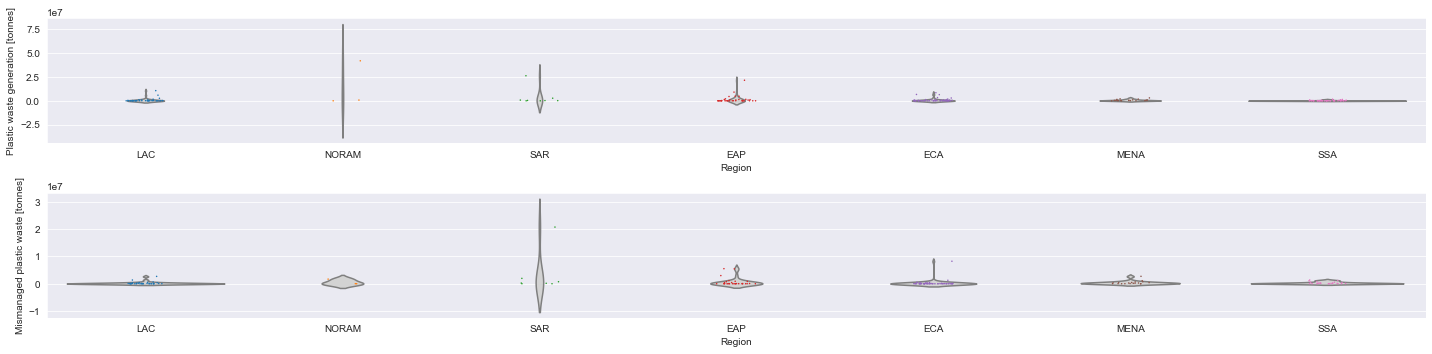

In [22]:
# My first attempt at violin plots, but they're not very helpful here.

plt.subplot(2,1,1)
sns.violinplot(x='Region', y='Plastic waste generation [tonnes]', data=df1, color='lightgray', inner=None)
sns.stripplot(x='Region', y='Plastic waste generation [tonnes]', data=df1, jitter=True, size=1.5)

plt.subplot(2,1,2)
sns.violinplot(x='Region', y='Mismanaged plastic waste [tonnes]', data=df1, color='lightgray', inner=None)
sns.stripplot(x='Region', y='Mismanaged plastic waste [tonnes]', data=df1, jitter=True, size=1.5)

plt.tight_layout()
plt.show()

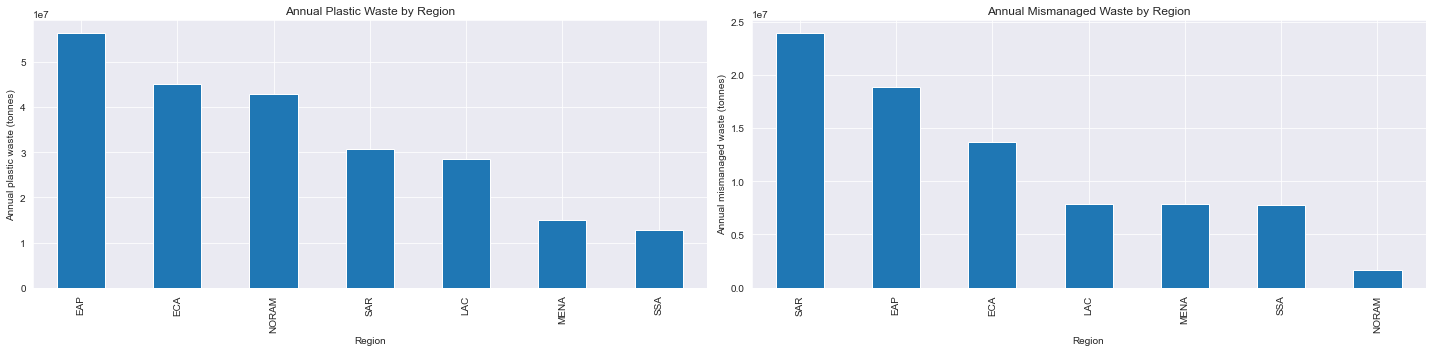

In [23]:
plt.subplot(1,2,1)
df1.groupby(['Region'])['Plastic waste generation [tonnes]'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Annual plastic waste (tonnes)')
plt.title('Annual Plastic Waste by Region')

plt.subplot(1,2,2)
df1.groupby(['Region'])['Mismanaged plastic waste [tonnes]'].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Annual mismanaged waste (tonnes)')
plt.title('Annual Mismanaged Waste by Region')

plt.tight_layout()
plt.show()

- East Asia and the Pacific (EAP), Europe and Central Asia (ECA), and North America generate the highest levels of annual plastic waste, **~64%** of the world's global plastic waste
- At the other end of the spectrum, Middle East and North Africa, and Sub-Saharan Africa generate the least amount of plastic waste, only **~12%**
- Because mismanaged waste poses the greatest threats to our environment and overall health, it is an important factor to consider in this analysis. While EAP, ECA, and North America generate the most waste by region, the most **mismanaged waste** is generated in South Asia (SAR) and EAP, nearly **52%**. By contrast, North America accounts for only 2%.

### 4. As we become wealthier, we create more plastic waste

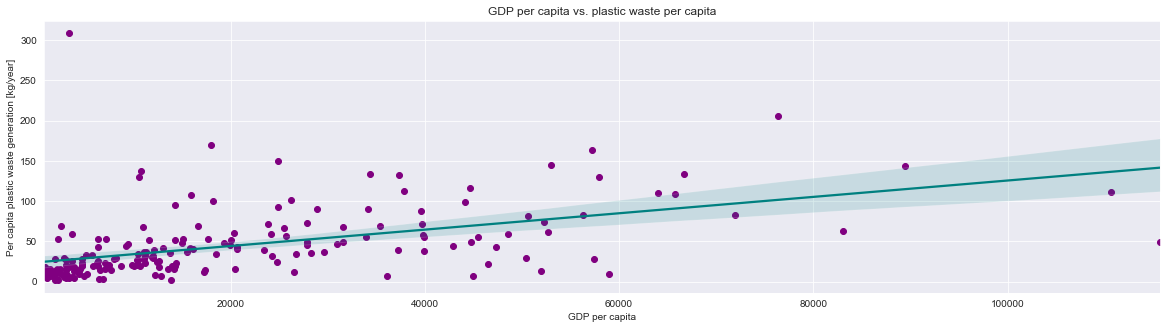

In [24]:
plt.scatter(df1['GDP per capita'], df1['Per capita plastic waste generation [kg/year]'], color='purple')
plt.xlabel('2016 GDP per capita')
plt.ylabel('Annual plastic waste per capita (kg)')
plt.title('GDP per capita vs. plastic waste per capita')
sns.regplot(x='GDP per capita', y='Per capita plastic waste generation [kg/year]', data=df1, color='teal', scatter=None)
plt.show()

- There is a positive correlation between GDP per capita and plastic waste per capita, indicating that the wealthier we become, the more waste we create
- With a GDP per capita of 10,000 or less, plastic waste per capita is relatively the same and remains under 50 kg/year. However, once GDP increase past this point, plastic waste also increases.
- Micronesia Fed. Sts. represents an extreme outlier in the data, and generates over 300 kg/year plastic waste per capita. Further analysis is recommended to better understand why an island with a small population (less than 114,000) is generating such a high amount of waste.

### 5. As we become wealthier, we are better at managing our waste

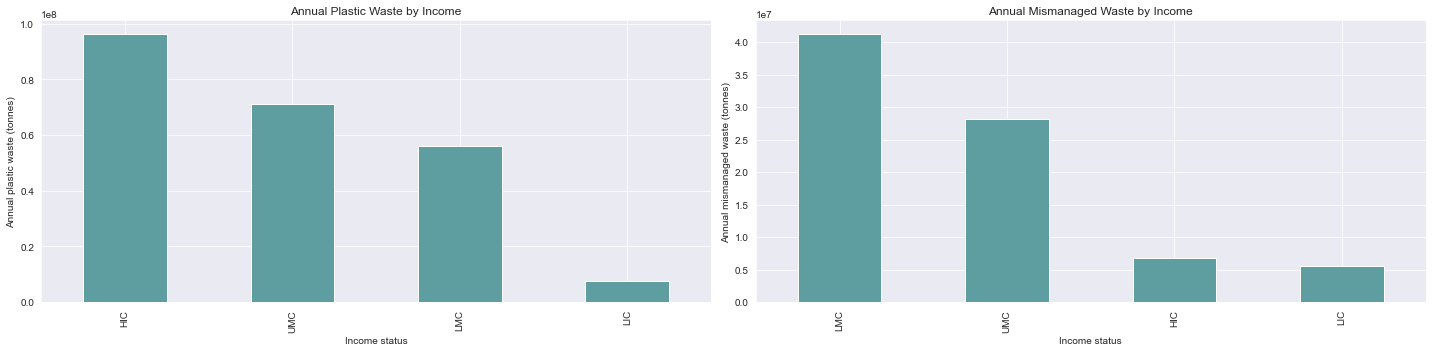

In [25]:
plt.subplot(1,2,1)
df1.groupby(['Income status'])['Plastic waste generation [tonnes]'].sum().sort_values(ascending=False).plot(kind='bar', color='cadetblue')
plt.ylabel('Annual plastic waste (tonnes)')
plt.title('Annual Plastic Waste by Income')

plt.subplot(1,2,2)
df1.groupby(['Income status'])['Mismanaged plastic waste [tonnes]'].sum().sort_values(ascending=False).plot(kind='bar', color='cadetblue')
plt.ylabel('Annual mismanaged waste (tonnes)')
plt.title('Annual Mismanaged Waste by Income')

plt.tight_layout()
plt.show()

- High income countries generate **42%** of the world's plastic waste, followed by upper-middle income countries, who generate 31%. Efforts to decrease plastic global waste should focus on countries with higher incomes.

- By contrast, lower-middle income countries generate **51%** of the world's mismanaged waste, indicating that a country's wealth affects the ability to effectively manage plastic waste

- Upper-middle income countries generate the second highest overall plastic waste, 31%, and the second highest mismanaged waste, 35%. It would be worth analyzing this region in more detail to determine why, as a region made up of wealthier countries, it struggles to manage its waste.

### Final Insights

- **85%** of the world’s plastic waste is generated in high income countries, but only 7% of this waste is mismanaged. In contrast, **94%** is mismanaged in low income countries.

- Regionally, our highest waste mismanagement levels occur in South Asia, East Asia, and the Pacific, which account for 52% of the world's mismanaged plastic. India, Indonesia, and China alone generate **74%** of this waste, and represent key opportunities for improvement. 

- We generate more plastic waste in the United States than in any other country, 60% more than in India and 95% more than in China. It is the only **high income** country among the top 10 countries with the highest mismanaged waste.